In [8]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab as pl
font = {'size'   : 20}
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **font)
from ase.io import read, write


Energy plot from logCut

In [9]:
path = Path("/work/surf/iter3/bigB_sims/tracker_bigb")

Text(0, 0.5, 'Total energy in eV')

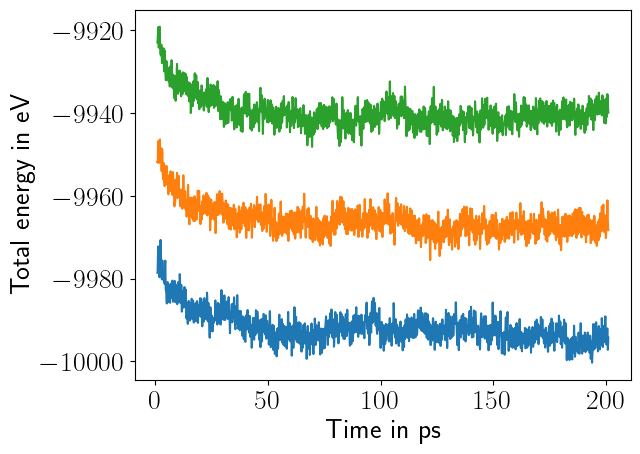

In [10]:
init_index = 10
df1 = pd.read_table(path/"sim_0/logCut.lammps", delim_whitespace=True)[init_index:]
df2 = pd.read_table(path/"sim_1/logCut.lammps", delim_whitespace=True)[init_index:]
df3 = pd.read_table(path/"sim_2/logCut.lammps", delim_whitespace=True)[init_index:]
plt.plot(df1['Time'], df1['TotEng'])
plt.plot(df2['Time'], df2['TotEng'])
plt.plot(df3['Time'], df3['TotEng'])
plt.xlabel("Time in ps")
plt.ylabel("Total energy in eV")

In [11]:
# Balancing to get interface free energy
G_h2o  = -13.907 #eV
G_h2   = -6.745  #eV
# E_slab = ??

def count_H_and_O(atoms, n_iro2=192, n_h2o=400):
    ans            = atoms.get_atomic_numbers()
    unique, counts = np.unique(ans, return_counts=True)
    dict_z_count   = dict(zip(unique,counts))
    n_ir = dict_z_count[77] - n_iro2
    n_o  = dict_z_count[8]  - 2*n_iro2 - n_h2o 
    n_h  = dict_z_count[1]  - 2*n_h2o
    return {"Ir": n_ir, "O": n_o, "H": n_h}

sim_0:  {'Ir': 0, 'O': 33, 'H': 37}
sim_1:  {'Ir': 0, 'O': 30, 'H': 34}
sim_2:  {'Ir': 0, 'O': 29, 'H': 29}
Relative difference in free energy =  [5.664785866667444, 0.0, 2.728836800002682]


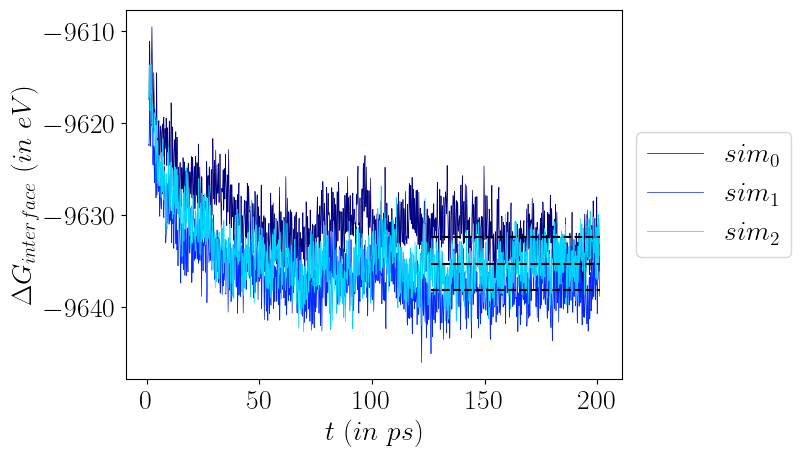

In [30]:
def new_col(energy):
    return (energy + y_H2*G_h2 - x_H2O*G_h2o)

dfs = [df1, df2, df3]
colors = pl.cm.jet(np.linspace(0,1,7))

for i,df in enumerate(dfs):
    foo = read(path/f"sim_{i}/mix.xyz")
    dict_counts = count_H_and_O(foo)
    print(f'sim_{i}: ', dict_counts)
    x_H2O = dict_counts['O']
    y_H2  = (2*x_H2O - dict_counts['H'])/2
    df['FreeEng'] = df['TotEng'].apply(new_col)
    plt.plot(df['Time'], df['FreeEng'], color=colors[i], label=f"$sim_{i}$", lw=0.5, alpha=1.0)

segment = -750 # del_time = 0.1 * time_in_ps 
avg_free_energy_list = []
for i, df in enumerate(dfs):
    avg_free_energy = df[segment:].mean()['FreeEng']
    avg_free_energy_list.append(avg_free_energy)
    plt.hlines(y=avg_free_energy, xmin=df.iloc[segment]['Time'], xmax=df.iloc[-1]['Time'], colors='k', ls='--')
relative_avg_free_energy = [f - min(avg_free_energy_list) for f in avg_free_energy_list]
print("Relative difference in free energy = ", relative_avg_free_energy)

plt.xticks(range(0,201,50))
plt.xlabel("$t$ $(in$ $ps)$")
plt.ylabel("$\Delta G_{interface}$ $(in$ $eV)$")
leg = plt.legend(loc='center left', prop={'size': 20}, bbox_to_anchor=(1, 0.5) )


In [13]:
avg_free_energy = []
for df in [df1, df2, df3]:
    avg_free_energy.append(df[segment:].mean()['FreeEng'])
print(avg_free_energy)
relative_avg_free_energy = [f - min(avg_free_energy) for f in avg_free_energy]
print(relative_avg_free_energy)


[-9632.819775666665, -9637.971283666668, -9635.0576695]
[5.15150800000265, 0.0, 2.913614166667685]


In [14]:
df1.iloc[segment]['Time']

141.1